In [1]:
#coding=utf-8
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,ZeroPadding2D
from tensorflow.python.keras.layers import add,Flatten
from tensorflow.python.keras.backend import squeeze
# from tensorflow.python.keras.optimizers import Adam
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
# from tensorflow.python.keras.optimizers import SGD
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  
def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,inpt])
        return x
 
inpt = Input(shape=(256,256,1))
x=inpt
# x = ZeroPadding2D((3,3))(inpt)
x = Conv2d_BN(x,nb_filter=64,kernel_size=(7,7),strides=(2,2),padding='valid')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
 
 
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Dense(1,activation='sigmoid')(x)
model = Model(inputs=inpt,outputs=x)
# sgd = SGD(decay=0.0001,momentum=0.9)
# adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 125, 125, 64) 3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 125, 125, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
data=np.load('/home/chase/Boyka/Lyu/rainfall_pre_reg/data/rain_data.npy')
data=np.expand_dims(data,axis=-1)
rain=np.load('/home/chase/Boyka/Lyu/rainfall_pre_reg/data/label.npy')
# rain=np.expand_dims(rain,axis=-1)
print(data.shape,rain.shape)

(1000, 256, 256, 1) (1000, 8, 8)


In [3]:
train_x=data[:-100]
test_x=data[-100:]
train_y=rain[:-100]
test_y=rain[-100:]

In [4]:
NUM_EPOCHS=200
BATCH_SIZE=64
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(900, 256, 256, 1) (100, 256, 256, 1) (900, 8, 8) (100, 8, 8)


In [5]:
history=model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_x, test_y),shuffle=True)
model.save('Pre_ResNet50_1000_200.h5')


Epoch 1/200
15/15 [==============================] - 163s 11s/step - loss: 0.2012 - mean_squared_error: 0.2012 - val_loss: 0.3327 - val_mean_squared_error: 0.3327
Epoch 2/200
15/15 [==============================] - 159s 11s/step - loss: 0.1699 - mean_squared_error: 0.1699 - val_loss: 0.3393 - val_mean_squared_error: 0.3393
Epoch 3/200
15/15 [==============================] - 159s 11s/step - loss: 0.1369 - mean_squared_error: 0.1369 - val_loss: 0.3404 - val_mean_squared_error: 0.3404
Epoch 4/200
15/15 [==============================] - 158s 11s/step - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.3405 - val_mean_squared_error: 0.3405
Epoch 5/200
15/15 [==============================] - 159s 11s/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.3414 - val_mean_squared_error: 0.3414
Epoch 6/200
15/15 [==============================] - 159s 11s/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.3396 - val_mean_squared_error: 0.3396
Epoch 7/200
15/15 [===

15/15 [==============================] - 158s 11s/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 52/200
15/15 [==============================] - 159s 11s/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 53/200
15/15 [==============================] - 158s 11s/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 54/200
15/15 [==============================] - 158s 11s/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 55/200
15/15 [==============================] - 158s 11s/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 56/200
15/15 [==============================] - 159s 11s/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 57/200
15/15 [=========

15/15 [==============================] - 159s 11s/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 102/200
15/15 [==============================] - 159s 11s/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0727 - val_mean_squared_error: 0.0727
Epoch 103/200
15/15 [==============================] - 159s 11s/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0763 - val_mean_squared_error: 0.0763
Epoch 104/200
15/15 [==============================] - 159s 11s/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 105/200
15/15 [==============================] - 159s 11s/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 106/200
15/15 [==============================] - 159s 11s/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 107/200
15/15 [===

Epoch 151/200
15/15 [==============================] - 159s 11s/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 152/200
15/15 [==============================] - 159s 11s/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 153/200
15/15 [==============================] - 159s 11s/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 154/200
15/15 [==============================] - 159s 11s/step - loss: 9.6376e-04 - mean_squared_error: 9.6376e-04 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 155/200
15/15 [==============================] - 159s 11s/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 156/200
15/15 [==============================] - 159s 11s/step - loss: 9.6722e-04 - mean_squared_error: 9.6722e-04 - val_loss: 0.0246 - val_mean_squared_error: 0

/home/chase/.local/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [6]:
loss, acc = model.evaluate(test_x, test_y, batch_size=BATCH_SIZE)

2/2 [==============================] - 3s 1s/step - loss: 0.3374 - mean_squared_error: 0.3374


In [17]:
print("\nAcc: {:.3f}".format(acc))
print(history.history.keys())
loss = history.history['loss']
mean_squared_error = history.history['mean_squared_error']
val_loss = history.history['val_loss']
val_mean_squared_error = history.history['val_mean_squared_error']

import pickle
 
with open('Pre_Resnet50_200.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Acc: 0.337
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


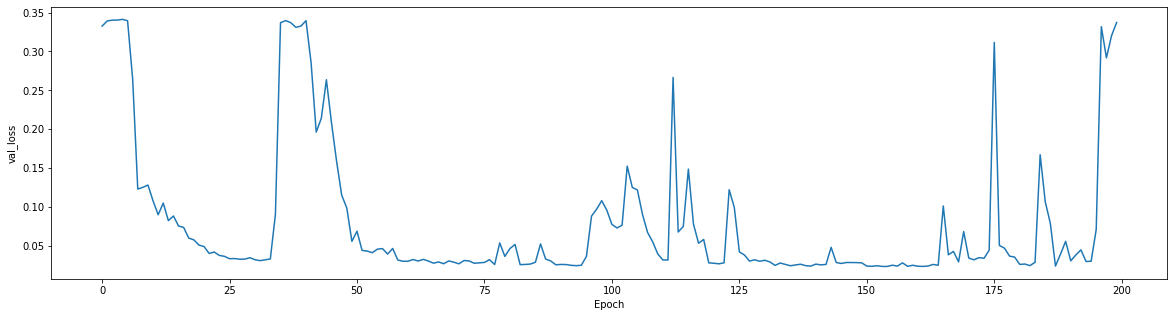

In [18]:
# model.save('ResNet50_1000_50.h5')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.plot([i for i in range(len(val_loss))],val_loss)

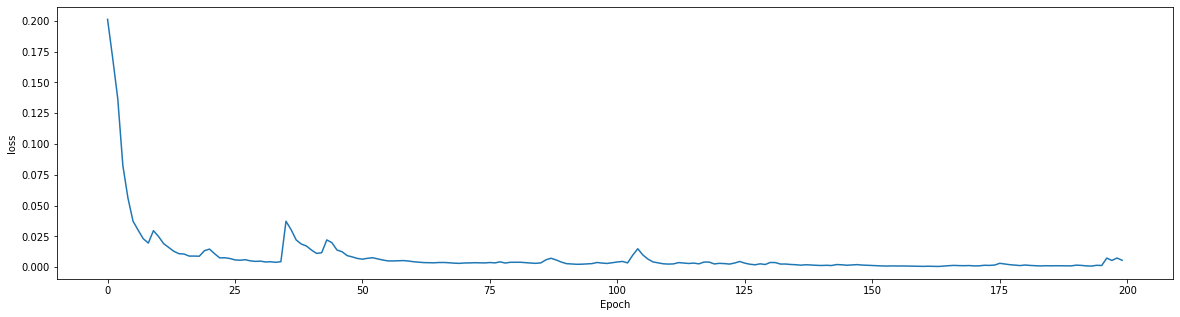

In [19]:
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot([i for i in range(len(loss))],loss)

In [ ]:
from tensorflow.python.keras.models import load_model
model=load_model('Pre_ResNet50_1000_200.h5')

In [ ]:
history_200_300=model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_x, test_y),shuffle=True)
model.save('Pre_ResNet50_1000_300.h5')

Epoch 1/200
15/15 [==============================] - 159s 11s/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3374 - val_mean_squared_error: 0.3374
Epoch 2/200
15/15 [==============================] - 159s 11s/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3366 - val_mean_squared_error: 0.3366
Epoch 3/200
15/15 [==============================] - 159s 11s/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3146 - val_mean_squared_error: 0.3146
Epoch 4/200
15/15 [==============================] - 160s 11s/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3139 - val_mean_squared_error: 0.3139
Epoch 5/200
15/15 [==============================] - 163s 11s/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 6/200
10/15 [===================>..........] - ETA: 57s - loss: 0.0048 - mean_squared_error: 0.0048 